In [1]:
# Importing libraries to use the Kaggle 'API'.
!pip install kaggle 
import kaggle # Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Downloading the Dataset using Kaggle API-

!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


Dataset has been dowloaded already in the file path showing above in zip format. Now we have to have to extract the data from the zip file to csv here and for that we will use Zip library.

In [5]:
# Extracting file from zip file

import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip') # Loading the file basically 
zip_ref.extractall() # extract file to directory
zip_ref.close() # close file

In [6]:
import pandas as pd
import numpy as np

# Read data from the file
df = pd.read_csv('orders.csv', na_values=['Not Available','unknown'])
df.head(30)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [7]:
# Checking the data types of the columns and No. of columns with Non-Null Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [8]:
# Checking the Unique Values in 'Ship Mode'
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

There are two Unnecessary values in the 'Ship Mode' column. We will replace it with NaN value. To do so, we will jump to the code where we have used read the file and use 'na_values' Option and run the code again. The 'Not Available','unknown' has been replaced by NaN.

In [10]:
# Renaming columns names ..make them lower case and replace space with underscore
df.rename(columns={'Order Id':'order_id', 'City':'city'})

# But it is a long process if we try to convert each column one by one. So we will convert them all at once in the next step.

,order_id,Order Date,Ship Mode,Segment,Country,city,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


In [11]:
# Converting the columns name in lower case so that it is easy to code ahead.
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_') # The spaces between the column has been replaced by '-'. 
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [12]:
# Deriving new columns- discount , sale price and profit

df['discount']=df['list_price']*df['discount_percent']*.01 # Calculating the Discount they are giving to the customers
df['sale_price']= df['list_price']-df['discount'] # Calculating the Sale Price
df['profit']=df['sale_price']-df['cost_price'] # Profit Earned
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [13]:
#drop cost price list price and discount percent columns
df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)

In [14]:
# Now the order_date is Object type which should be in Datetime Format.

# Converting order date from object data type to datetime
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d") # String is in Year, Month, Day format.

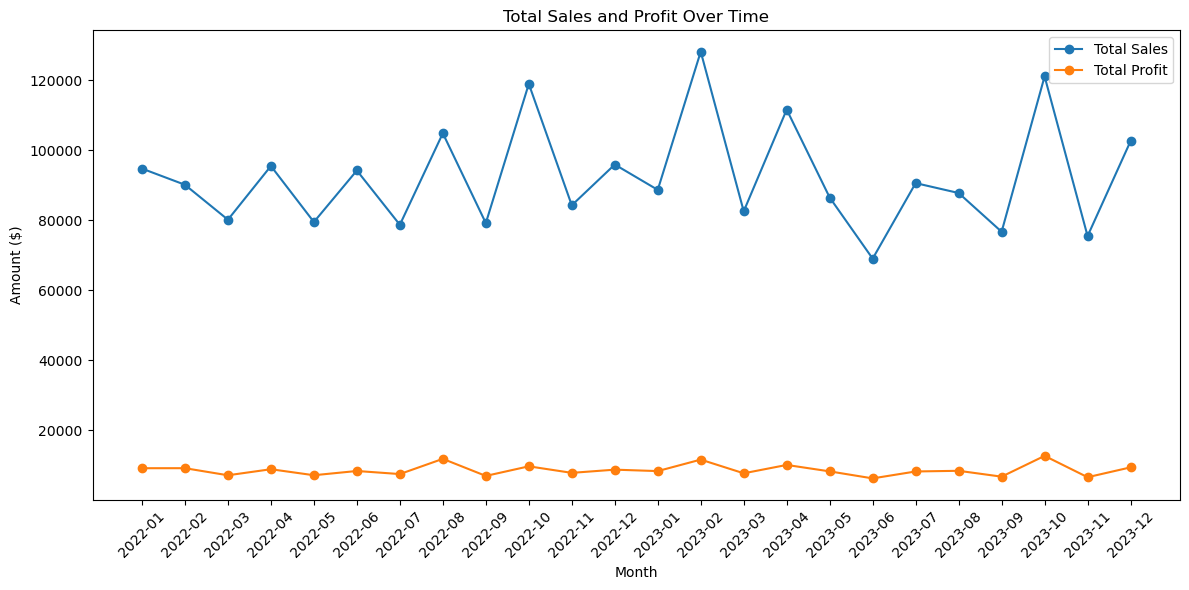

In [15]:
# aggregate sales and profit by month
monthly_data = df.groupby(df['order_date'].dt.to_period('M')).agg({
    'sale_price': 'sum',
    'profit': 'sum'
}).reset_index()

# plot sales and profit
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['order_date'].astype(str), monthly_data['sale_price'], label='Total Sales', marker='o')
plt.plot(monthly_data['order_date'].astype(str), monthly_data['profit'], label='Total Profit', marker='o')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Total Sales and Profit Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Sales have gone up and down from January 2022 to December 2023, with big increases in November 2022 and August 2023. However, profits have stayed relatively the same and low, indicating that the company is spending a lot of money. This suggests that the company needs to manage its costs better to increase profits. Sales are unpredictable, but profits remain low.`

In [17]:
# Calculate Total Sales and Profit Margin
df['total_sales'] = df['sale_price'] * df['quantity']
df['profit_margin'] = (df['profit'] / df['total_sales']) * 100

In [18]:
!pip install pymysql

In [19]:
import pymysql
connection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    password='1234',
    database='lova_db'
)
print("Connection successful!")

Connection successful!


In [20]:
!pip install SQLAlchemy

In [21]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [22]:

!pip install --upgrade sqlalchemy


In [ ]:
import mysql.connector

try:
    connection = mysql.connector.connect(
        host='127.0.0.1',
        user='root',
        password='1234',
        database='lovadb'
    )
    if connection.is_connected():
        print("Connection successful!")
        connection.close()
except mysql.connector.Error as err:
    print("Error:", err)


In [ ]:
# import mysql.connector
# from sqlalchemy import create_engine


# username = 'root'
# password = '1234'
# host = '127.0.0.1'
# database = 'lovadb'

# engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}", pool_pre_ping=True)

# try:
#     with engine.connect() as connection:
#         result = connection.execute("SHOW TABLES;")
#         for row in result:
#             print(row)
#     print("Connection to database successful!")
# except Exception as e:
#     print("Failed to connect to database:", e)

In [ ]:
# !pip install sqlalchemy pymysql

In [ ]:
# Now loading the data in MySQL

# import sqlalchemy as sal
# from sqlalchemy.pool import NullPool


# # Replace the credentials with your own
# username = 'your_username'
# password = 'your_password'        # Replace it with your SQL credentials
# host = 'your_host'
# database = 'database_name'


# # Create engine with MySQL Connector/Python
# engine = sal.create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}',
#                            poolclass=NullPool)
# # from sqlalchemy import create_engine
# # engine = create_engine("mysql+pymysql://user:pw@host/db", pool_pre_ping=True)

# # Establish connection
# conn = engine.connect()


# # Load data into MySQL using replace option
# df.to_sql(name='your_table', con=engine, schema='retail_orders', if_exists='replace', index=False)